In [1]:
import pandas as pd
df=pd.read_csv("weight-height.csv")
df.shape

(10000, 3)

In [2]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [3]:
df['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df.Gender.nunique()

2

In [7]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


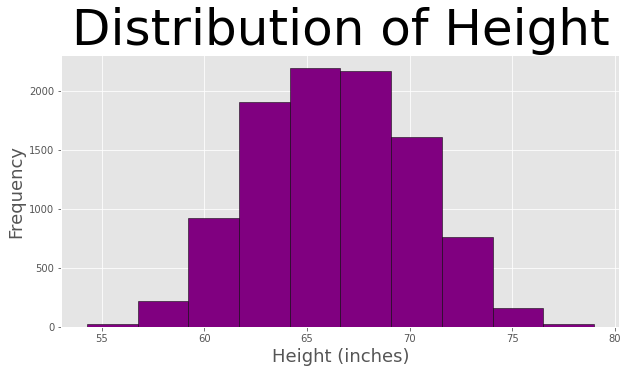

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Histogram of the height
df.Height.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,5))
plt.title('Distribution of Height', size=50)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)
plt.show()


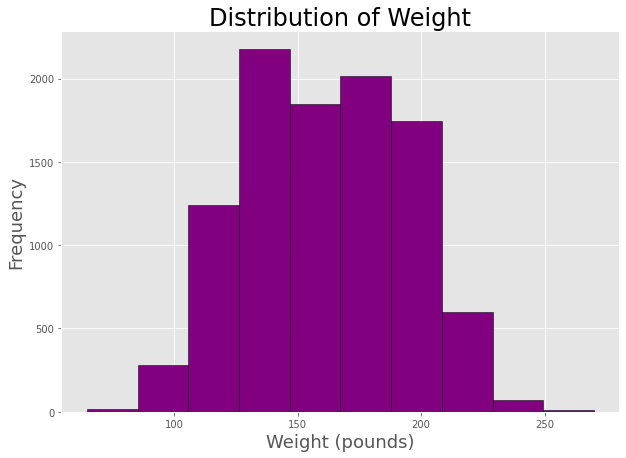

In [ ]:
# Histogram of the weight
df.Weight.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);
plt.show()

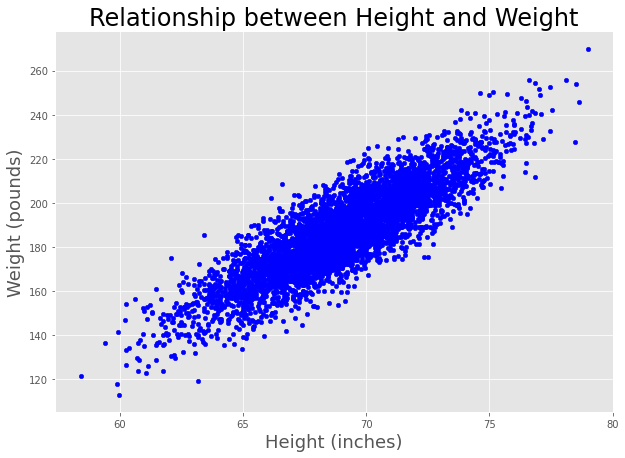

In [10]:
# Scatter plot of Height and Weight

df[df['Gender']=='Male'].plot(kind='scatter', x='Height',y='Weight', color='blue', figsize=(10,7))
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.show()

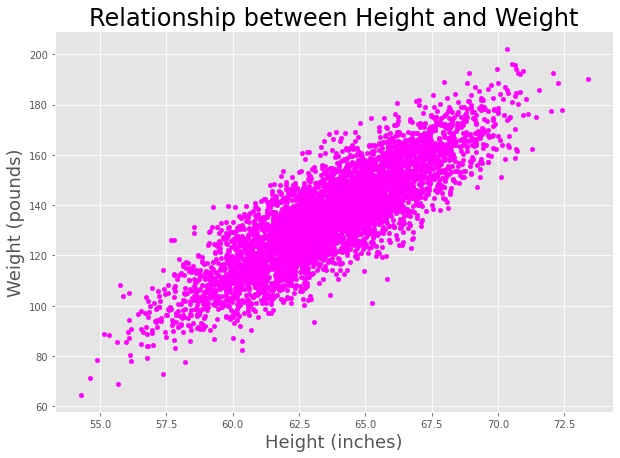

In [11]:
# Scatter plot of Height and Weight

df[df['Gender']=='Female'].plot(kind='scatter', x='Height',y='Weight', color='magenta',figsize=(10,7))
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.show()

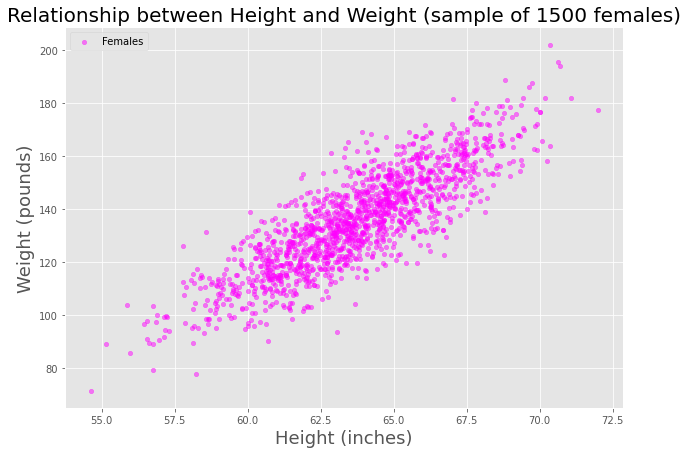

In [12]:
# Scatter plot of 1500 females

sample_females = df[df['Gender']=='Female'].sample(1500)
sample_females.plot(kind='scatter', x='Height',y='Weight', color='magenta',alpha=0.5, figsize=(10,7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 1500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.show()

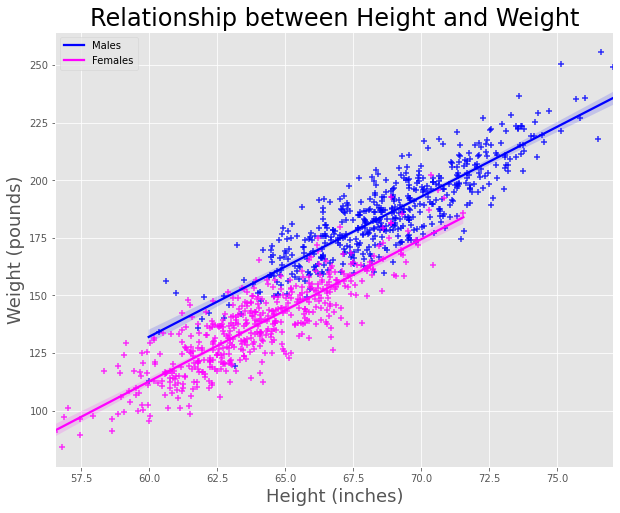

In [ ]:
import seaborn as sns

# Samples
df_males_sample= df[df['Gender']=='Male'].sample(500)
df_females_sample= df[df['Gender']=='Female'].sample(500)

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df_males_sample.Height,y=df_males_sample.Weight,color='blue', marker='+')
sns.regplot(x=df_females_sample.Height,y=df_females_sample.Weight,color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.show()

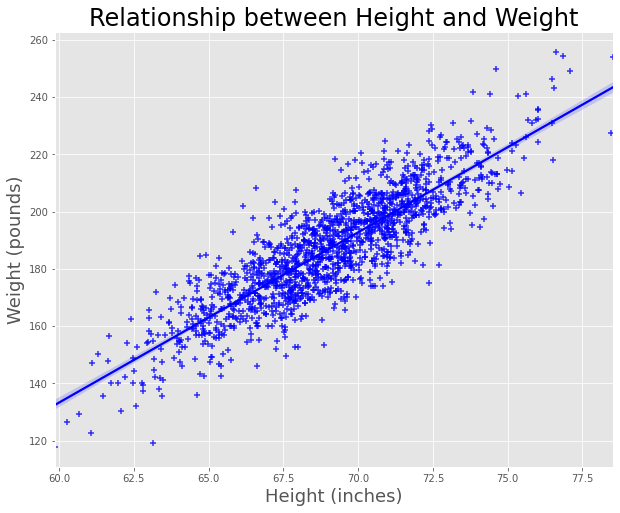

In [17]:
import seaborn as sns

# Samples
df_males_sample= df[df['Gender']=='Male'].sample(1500)

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,8))
sns.regplot(x=df_males_sample.Height,y=df_males_sample.Weight,color='blue', marker='+')

# Legend, title and labels.
#plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

df_males = df[df['Gender']=='Male']

# Create linear regression object.
lr_males= LinearRegression()

# Fit linear regression.
lr_males.fit(df_males[['Height']], df_males['Weight'])

# Get the slope and intercept of the line best fit.
print(lr_males.intercept_)
# -224.49884070545772

print(lr_males.coef_)
# 5.96177381


-224.49884070650657
[5.96177381]


In [28]:
m_height=df_males[['Height']].values

In [29]:
predicted_valuesm = [lr_males.coef_ * i + lr_males.intercept_ for i in m_height]

In [15]:
print(lr_males.predict([[70]]))

[192.82532614]


In [18]:
from sklearn.linear_model import LinearRegression

df_females = df[df['Gender']=='Female']

# Create linear regression object.
lr_females= LinearRegression()

# Fit linear regression.
lr_females.fit(df_females[['Height']], df_females['Weight'])

# Get the slope and intercept of the line best fit.
print(lr_females.intercept_)
# -246.01326574667277

print(lr_females.coef_)
# 5.99404661

-246.01326573969692
[5.99404661]


In [23]:
f_height=df_females[['Height']].values

In [24]:
predicted_valuesf = [lr_females.coef_ * i + lr_females.intercept_ for i in f_height]

In [19]:
print(lr_females.predict([[70]]))

[173.56999729]


In [ ]:
# Dataframe containing only females.
df_females = df[df['Gender']=='Female']

# Correlation coefficients 
df_females.corr()

,Height,Weight
Height,1.000000,0.849609
Weight,0.849609,1.000000


In [ ]:
# Dataframe containing only males.
df_males = df[df['Gender']=='Male']

# Correlation coefficients 
df_males.corr()

,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


In [20]:
Yf=df_females[['Weight']].values

In [25]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Yf,predicted_valuesf))


Mean Absolute Error: 7.99431355246998


In [26]:
Ym=df_males[['Weight']].values

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Ym,predicted_valuesm))


Mean Absolute Error: 7.987528541927051


In [31]:
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import mean_squared_error, r2_score
print('Variance score: %.2f' % r2_score(Ym, predicted_valuesm))

Variance score: 0.74


In [32]:
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import mean_squared_error, r2_score
print('Variance score: %.2f' % r2_score(Yf, predicted_valuesf))

Variance score: 0.72
